In [2]:
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


#NLTK-------------------------------
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
#from nltk.stemporter import PorterStemmer

# Import libraries for feature 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Read files
textfile = r'/gdrive/My Drive/CIS_508/Assignment_4/Comments.csv'
textData = pd.read_csv(textfile) #creates a dataframe

CustInfofile = r'/gdrive/My Drive/CIS_508/Assignment_4/Customers.csv'
CustInfoData = pd.read_csv(CustInfofile)  #creates a dataframe

print(textData.shape)
print(CustInfoData.shape)


(2070, 2)
(2070, 17)


In [ ]:
#Extract target column from Customer Info file
y_train = CustInfoData["TARGET"]
X_train = CustInfoData.drop(columns=["TARGET"]) #extracting training data without the target column
                     
print(X_train.shape)
print(X_train.head())
print(textData.shape)
print(textData.head())
print(y_train)

(2070, 16)
   ID Sex Status  Children  Est_Income Car_Owner   Usage        Age  RatePlan  \
0   1   F      S         1    38000.00         N  229.64  24.393333         3   
1   6   M      M         2    29616.00         N   75.29  49.426667         2   
2   8   M      M         0    19732.80         N   47.25  50.673333         3   
3  11   M      S         2       96.33         N   59.01  56.473333         1   
4  14   F      M         2    52004.80         N   28.14  25.140000         1   

   LongDistance  International   Local  Dropped Paymethod LocalBilltype  \
0         23.56            0.0  206.08        0        CC        Budget   
1         29.78            0.0   45.50        0        CH     FreeLocal   
2         24.81            0.0   22.44        0        CC     FreeLocal   
3         26.13            0.0   32.88        1        CC        Budget   
4          5.03            0.0   23.11        0        CH        Budget   

  LongDistanceBilltype  
0       Intnl_discount  
1

In [ ]:
#Tokenize - Split the sentences to lists of words
textData['CommentsTokenized'] = textData['Comments'].apply(word_tokenize)

export_csv = textData.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/TextDataTokenized.csv')




In [ ]:
# Use English stemmer.
stemmer = SnowballStemmer("english")

#Now do stemming - create a new dataframe to store stemmed version
newTextData=pd.DataFrame()
newTextData=textData.drop(columns=["CommentsTokenized","Comments"])
newTextData['CommentsTokenizedStemmed'] = textData['CommentsTokenized'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

export_csv = newTextData.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/newTextDataTS.csv')


In [ ]:
# Use English stemmer.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#Now do stemming - create a new dataframe to store stemmed version
newTextData=pd.DataFrame()
newTextData=textData.drop(columns=["CommentsTokenized","Comments"])
newTextData['CommentsTokenizedStemmed'] = textData['CommentsTokenized'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

export_csv = newTextData.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/newTextDataPSTS.csv')

In [ ]:

#Join stemmed strings
newTextData['CommentsTokenizedStemmed'] = newTextData['CommentsTokenizedStemmed'].apply(lambda x: " ".join(x))

export_csv = newTextData.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/newTextData-Joined.csv')

In [ ]:
#Do Bag-Of-Words model - Term - Document Matrix
#Learn the vocabulary dictionary and return term-document matrix.
#count_vect = CountVectorizer(stop_words=None)
count_vect = CountVectorizer(stop_words='english',lowercase=False)
TD_counts = count_vect.fit_transform(newTextData.CommentsTokenizedStemmed)
print(TD_counts.shape)
print(TD_counts.dtype)
print(count_vect.get_feature_names())
#print(TD_counts)
DF_TD_Counts=pd.DataFrame(TD_counts.toarray())
print(DF_TD_Counts)
export_csv = DF_TD_Counts.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/TD_counts-TokenizedStemmed.csv')


(2070, 354)
int64
['3399', '3g', 'abysm', 'access', 'accessori', 'adapt', 'add', 'addit', 'additon', 'address', 'adit', 'adress', 'advertis', 'afraid', 'alway', 'angel', 'angri', 'ani', 'anoth', 'anyth', 'anytim', 'area', 'asap', 'ask', 'bad', 'basic', 'bateri', 'batteri', 'becaus', 'believ', 'better', 'bigger', 'book', 'bought', 'brain', 'bring', 'built', 'busi', 'button', 'buy', 'cancel', 'cancer', 'car', 'care', 'carrier', 'caus', 'cc', 'cell', 'certain', 'chang', 'charg', 'charger', 'check', 'chip', 'citi', 'claim', 'cleariti', 'cold', 'comapr', 'compani', 'compar', 'competit', 'complain', 'complaint', 'concept', 'connect', 'consisit', 'consist', 'constan', 'contact', 'continu', 'contract', 'correct', 'cost', 'coupl', 'cover', 'coverag', 'creat', 'credit', 'cstmer', 'cstmr', 'current', 'cust', 'custom', 'customr', 'date', 'day', 'dead', 'decent', 'defect', 'deo', 'did', 'die', 'differ', 'difficult', 'digiti', 'direct', 'disabl', 'doe', 'don', 'dont', 'drop', 'dure', 'easier', 'effe

In [ ]:
#Compute TF-IDF Matrix
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(TD_counts)
print(X_train_tfidf.shape)
DF_TF_IDF=pd.DataFrame(X_train_tfidf.toarray())
print(DF_TF_IDF)
export_csv= DF_TF_IDF.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/TFIDF_counts-TokenizedStemmed.csv')


(2070, 354)
      0    1    2    3        4    5    6    7    8         9    ...  344  \
0     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
1     0.0  0.0  0.0  0.0  0.27568  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
2     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
3     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
4     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
...   ...  ...  ...  ...      ...  ...  ...  ...  ...       ...  ...  ...   
2065  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
2066  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
2067  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
2068  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.772949  ...  0.0   
2069  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   

      345  346       347  348  349  350  351  352  353  
0     

In [ ]:
#Feature selection
#Suppose, we select 50 features with top 50 Fisher scores
selector = SelectKBest(k=25)
#selector = SelectKBest(score_func=chi2, k=25)

#new_DF_TF_IDF = SelectKBest(score_func=chi2, k=50).fit_transform(DF_TF_IDF,y_train)
new_DF_TF_IDF = selector.fit_transform(DF_TF_IDF,y_train)
print(new_DF_TF_IDF.shape)

feature_names_out = selector.get_support(indices=True)
print(feature_names_out)

DF_TF_IDF_SelectedFeatures= pd.DataFrame(new_DF_TF_IDF)
print(DF_TF_IDF_SelectedFeatures)

export_csv= DF_TF_IDF_SelectedFeatures.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/TFIDF_counts-Selected Features.csv')


(2070, 25)
[ 14  49  50  51  62  70  81 115 118 121 186 190 212 217 222 235 239 248
 249 259 273 307 313 319 342]
       0         1         2    3    4    5    6         7    8         9   \
0     0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000   
1     0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000   
2     0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000   
3     0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000   
4     0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000   
...   ...       ...       ...  ...  ...  ...  ...       ...  ...       ...   
2065  0.0  0.000000  0.446161  0.0  0.0  0.0  0.0  0.460113  0.0  0.457852   
2066  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000   
2067  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000   
2068  0.0  0.545354  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000   
2069  0.0  0.000000  0.00000

In [ ]:
#Construct a Random Forest Classifier on text data
clf=RandomForestClassifier()
RF_text = clf.fit(DF_TF_IDF_SelectedFeatures,y_train)
print("Accuracy score (training): {0:.6f}".format(clf.score(DF_TF_IDF_SelectedFeatures, y_train)))
rf_predictions = clf.predict(DF_TF_IDF_SelectedFeatures)
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_predictions))
print("Classification Report")
print(classification_report(y_train, rf_predictions))


Accuracy score (training): 0.630435
Confusion Matrix:
[[  61  743]
 [  22 1244]]
Classification Report
              precision    recall  f1-score   support

   Cancelled       0.73      0.08      0.14       804
     Current       0.63      0.98      0.76      1266

    accuracy                           0.63      2070
   macro avg       0.68      0.53      0.45      2070
weighted avg       0.67      0.63      0.52      2070



In [ ]:
#run cross-validation - Text Data
clf_cv_score = cross_val_score(clf, DF_TF_IDF_SelectedFeatures, y_train, cv=20, scoring="balanced_accuracy")
print("=== All Accuracy Scores ===")
print(clf_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - ON Text: ",clf_cv_score.mean())
print('\n')


=== All Accuracy Scores ===
[0.52864886 0.48896632 0.51645374 0.53290747 0.496875   0.5546875
 0.5265625  0.5265625  0.496875   0.5390625  0.54206349 0.52619048
 0.49662698 0.525      0.52619048 0.49662698 0.5125     0.53869048
 0.48075397 0.50119048]


=== Mean Accuracy Score ===
Mean Accuracy Score - ON Text:  0.5176717358691444




In [ ]:
#Construct a  gradient boosting  on text data
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
RF_text = clf.fit(DF_TF_IDF_SelectedFeatures,y_train)
print("Accuracy score (training): {0:.6f}".format(clf.score(DF_TF_IDF_SelectedFeatures, y_train)))
rf_predictions = clf.predict(DF_TF_IDF_SelectedFeatures)
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_predictions))
print("Classification Report")
print(classification_report(y_train, rf_predictions))

Accuracy score (training): 0.630435
Confusion Matrix:
[[  59  745]
 [  20 1246]]
Classification Report
              precision    recall  f1-score   support

   Cancelled       0.75      0.07      0.13       804
     Current       0.63      0.98      0.77      1266

    accuracy                           0.63      2070
   macro avg       0.69      0.53      0.45      2070
weighted avg       0.67      0.63      0.52      2070



In [ ]:
#run cross-validation - Text Data
clf_cv_score = cross_val_score(clf, DF_TF_IDF_SelectedFeatures, y_train, cv=20, scoring="balanced_accuracy")
print("=== All Accuracy Scores ===")
print(clf_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - ON Text: ",clf_cv_score.mean())
print('\n')

=== All Accuracy Scores ===
[0.52864886 0.50058072 0.51645374 0.53290747 0.496875   0.5546875
 0.5265625  0.534375   0.496875   0.5546875  0.54206349 0.52619048
 0.49662698 0.525      0.54206349 0.50456349 0.5125     0.53869048
 0.49662698 0.50912698]


=== Mean Accuracy Score ===
Mean Accuracy Score - ON Text:  0.521805283343012




In [ ]:
#merge files
DF_TF_IDF['ID'] = textData['ID']
combined = pd.merge(X_train, DF_TF_IDF, on ='ID')
print(combined.shape)
combined.head()
export_csv= combined.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/Combined2-Cust+TFIDF+SelectedFeatures.csv')


(2070, 370)


In [ ]:
#Do one Hot encoding for categorical features
X_cat = ["Sex","Status","Car_Owner","Paymethod","LocalBilltype","LongDistanceBilltype"]
#X_cat = combined.select_dtypes(exclude=['int','float64'])
print(X_cat)
combined_one_hot = pd.get_dummies(combined,columns=X_cat)
print(combined_one_hot.shape)
export_csv= combined_one_hot.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/combined_one_hot.csv')



['Sex', 'Status', 'Car_Owner', 'Paymethod', 'LocalBilltype', 'LongDistanceBilltype']
(2070, 378)


In [ ]:
#Construct a Random Forest Classifier on combined data
#clf1=RandomForestClassifier()
RF_Comb = clf.fit(combined_one_hot,y_train)
print("Accuracy score (training): {0:.6f}".format(clf.score(combined_one_hot, y_train)))
rf_predictions = clf.predict(combined_one_hot)
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_predictions))
print("Classification Report")
print(classification_report(y_train, rf_predictions))



Accuracy score (training): 0.920773
Confusion Matrix:
[[ 711   93]
 [  71 1195]]
Classification Report
              precision    recall  f1-score   support

   Cancelled       0.91      0.88      0.90       804
     Current       0.93      0.94      0.94      1266

    accuracy                           0.92      2070
   macro avg       0.92      0.91      0.92      2070
weighted avg       0.92      0.92      0.92      2070



In [ ]:
#run cross-validation - COMBINED Data
rf_Comb_cv_score = cross_val_score(RF_Comb, combined_one_hot, y_train, cv=20, scoring="balanced_accuracy")
print("=== All Accuracy Scores ===")
print(rf_Comb_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - ON Text: ",rf_Comb_cv_score.mean())
print('\n')

=== All Accuracy Scores ===
[0.88714673 0.88714673 0.90727836 0.88346883 0.85       0.9265625
 0.8640625  0.8140625  0.871875   0.884375   0.95119048 0.88869048
 0.92956349 0.74007937 0.91369048 0.92738095 0.90575397 0.90119048
 0.83650794 0.91944444]


=== Mean Accuracy Score ===
Mean Accuracy Score - ON Text:  0.8844735106949283




In [ ]:
#Construct a Random Forest Classifier WITHOUT text data
print(CustInfoData.shape)
X_train1=combined_one_hot.iloc[:,1:10]
#X_train2=combined_one_hot.iloc[:,60:]
X_train2=combined_one_hot.iloc[:,35:]
print(X_train1.shape)
print(X_train1.head())
print(X_train2.shape)
print(X_train2.head())
combined1=pd.concat([X_train1, X_train2], axis=1)
print(combined1.shape)
print(combined1.head())
export_csv= combined1.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/combined1.csv')

(2070, 17)
(2070, 9)
   Children  Est_Income   Usage        Age  RatePlan  LongDistance  \
0         1    38000.00  229.64  24.393333         3         23.56   
1         2    29616.00   75.29  49.426667         2         29.78   
2         0    19732.80   47.25  50.673333         3         24.81   
3         2       96.33   59.01  56.473333         1         26.13   
4         2    52004.80   28.14  25.140000         1          5.03   

   International   Local  Dropped  
0            0.0  206.08        0  
1            0.0   45.50        0  
2            0.0   22.44        0  
3            0.0   32.88        1  
4            0.0   23.11        0  
(2070, 343)
    25   26   27   28   29   30   31   32   33   34  ...  Status_S  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         1   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [ ]:
#Construct a Random Forest Classifier WITHOUT text data

rf_NT=clf.fit(combined1,y_train)
print("Accuracy score (training): {0:.6f}".format(rf_NT.score(combined1, y_train)))
rf_predictions = rf_NT.predict(combined1)
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_predictions))
print("Classification Report")
print(classification_report(y_train, rf_predictions))


Accuracy score (training): 0.917874
Confusion Matrix:
[[ 714   90]
 [  80 1186]]
Classification Report
              precision    recall  f1-score   support

   Cancelled       0.90      0.89      0.89       804
     Current       0.93      0.94      0.93      1266

    accuracy                           0.92      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.92      0.92      0.92      2070



In [ ]:
#run cross-validation - WITHOUT Text Data
rf_NT_cv_score = cross_val_score(rf_NT, combined1, y_train, cv=20, scoring="balanced_accuracy")
print("=== All Accuracy Scores ===")
print(rf_NT_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - WITHOUT Text: ",rf_NT_cv_score.mean())
print('\n')


=== All Accuracy Scores ===
[0.86024003 0.89566396 0.93960511 0.88346883 0.8625     0.9296875
 0.8515625  0.8296875  0.8875     0.884375   0.95119048 0.88869048
 0.93412698 0.76388889 0.90119048 0.87738095 0.89325397 0.90912698
 0.83194444 0.92281746]


=== Mean Accuracy Score ===
Mean Accuracy Score - WITHOUT Text:  0.8848950771873791




In [ ]:
#Customer Info One-Hot Encoded
DF_Combined1= pd.DataFrame(combined1)
export_csv= DF_Combined1.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/CustInfo_Onehot_encoded.csv')

In [ ]:
#Do feature selection using a classification model
#clf = ExtraTreesClassifier(n_estimators=50)
#clf = GradientBoostingClassifier(n_estimators=50)
clf = DecisionTreeClassifier()
clf = clf.fit(DF_Combined1,y_train)
print(clf.feature_importances_)
#model = SelectFromModel(clf, prefit=True)
model = SelectFromModel(clf, prefit=True, max_features=7, threshold=-np.inf)
#model = SelectFromModel(clf, prefit=True)
X_new= model.transform(DF_Combined1)
X_new_SelectedFeatures= pd.DataFrame(X_new)
export_csv= X_new_SelectedFeatures.to_csv(r'/gdrive/My Drive/CIS_508/Assignment_4/X_new_SelectedFeatures.csv')

print(model.get_support())
print(X_new_SelectedFeatures)
#print(X_new_SelectedFeatures.shape)
#print(X_new_SelectedFeatures.head())


[1.28247138e-01 6.90054852e-02 1.45685481e-02 8.62709265e-02
 8.12393029e-02 1.36761571e-01 1.73189321e-03 1.57406658e-02
 8.58947361e-03 7.63331371e-04 0.00000000e+00 1.64437255e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.71974241e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.92690270e-04 0.00000000e+00
 0.00000000e+00 1.61646643e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.72498528e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.84748370e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.76944688e-04 0.00000000e+00 0.00000000e+00
 7.63331371e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
#Sequential Forward Search
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
!pip install clodsa==1.2.43
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

clf = DecisionTreeClassifier()

sfs1 = SFS(clf, 
           k_features=8, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(DF_Combined1,y_train)
sfs1.subsets_


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 352 out of 352 | elapsed:    1.8s finished

[2022-11-11 11:36:06] Features: 1/8 -- score: 0.8985507246376812[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 351 out of 351 | elapsed:    2.2s finished

[2022-11-11 11:36:08] Features: 2/8 -- score: 0.9338164251207729[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    2.5s finished

[2022-11-11 11:36:11] Features: 3/8 -- score: 0.9502415458937198[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.89855072]),
  'avg_score': 0.8985507246376812,
  'feature_names': ('Usage',)},
 2: {'feature_idx': (2, 4),
  'cv_scores': array([0.93381643]),
  'avg_score': 0.9338164251207729,
  'feature_names': ('Usage', 'RatePlan')},
 3: {'feature_idx': (2, 3, 4),
  'cv_scores': array([0.95024155]),
  'avg_score': 0.9502415458937198,
  'feature_names': ('Usage', 'Age', 'RatePlan')},
 4: {'feature_idx': (2, 3, 4, 5),
  'cv_scores': array([0.95410628]),
  'avg_score': 0.9541062801932367,
  'feature_names': ('Usage', 'Age', 'RatePlan', 'LongDistance')},
 5: {'feature_idx': (0, 2, 3, 4, 5),
  'cv_scores': array([0.95652174]),
  'avg_score': 0.9565217391304348,
  'feature_names': ('Children', 'Usage', 'Age', 'RatePlan', 'LongDistance')},
 6: {'feature_idx': (0, 2, 3, 4, 5, 319),
  'cv_scores': array([0.95748792]),
  'avg_score': 0.957487922705314,
  'feature_names': ('Children',
   'Usage',
   'Age',
   'RatePlan',
   'LongDistance',
   335)},
 7: {'feat

In [ ]:
#Sequential forward search result
print(sfs1.k_feature_names_)
print(sfs1.k_score_)

('Children', 'Est_Income', 'Usage', 'Age', 'RatePlan', 'LongDistance', 335, 'Paymethod_CC')
0.9584541062801932


In [ ]:
DF_Combined1

,Children,Est_Income,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,25,...,Status_S,Car_Owner_N,Car_Owner_Y,Paymethod_Auto,Paymethod_CC,Paymethod_CH,LocalBilltype_Budget,LocalBilltype_FreeLocal,LongDistanceBilltype_Intnl_discount,LongDistanceBilltype_Standard
0,1,38000.00,229.64,24.393333,3,23.56,0.00,206.08,0,0.0,...,1,1,0,0,1,0,1,0,1,0
1,2,29616.00,75.29,49.426667,2,29.78,0.00,45.50,0,0.0,...,0,1,0,0,0,1,0,1,0,1
2,0,19732.80,47.25,50.673333,3,24.81,0.00,22.44,0,0.0,...,0,1,0,0,1,0,0,1,0,1
3,2,96.33,59.01,56.473333,1,26.13,0.00,32.88,1,0.0,...,1,1,0,0,1,0,1,0,0,1
4,2,52004.80,28.14,25.140000,1,5.03,0.00,23.11,0,0.0,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,0,78851.30,29.04,48.373333,4,0.37,0.00,28.66,0,0.0,...,1,1,0,0,1,0,0,1,0,1
2066,1,17540.70,36.20,62.786667,1,22.17,0.57,13.45,0,0.0,...,1,0,1,1,0,0,1,0,0,1
2067,0,83891.90,74.40,61.020000,4,28.92,0.00,45.47,0,0.0,...,0,0,1,0,0,1,1,0,0,1
2068,2,28220.80,38.95,38.766667,4,26.49,0.00,12.46,0,0.0,...,0,1,0,0,1,0,0,1,0,1


In [ ]:


X= DF_Combined1[['Children', 'Est_Income', 'Usage', 'Age', 'RatePlan', 'LongDistance', 335, 'Paymethod_CC']]
X

,Children,Est_Income,Usage,Age,RatePlan,LongDistance,335,Paymethod_CC
0,1,38000.00,229.64,24.393333,3,23.56,0.000000,1
1,2,29616.00,75.29,49.426667,2,29.78,0.000000,0
2,0,19732.80,47.25,50.673333,3,24.81,0.000000,1
3,2,96.33,59.01,56.473333,1,26.13,0.000000,1
4,2,52004.80,28.14,25.140000,1,5.03,0.000000,0
...,...,...,...,...,...,...,...,...
2065,0,78851.30,29.04,48.373333,4,0.37,0.214868,1
2066,1,17540.70,36.20,62.786667,1,22.17,0.214868,0
2067,0,83891.90,74.40,61.020000,4,28.92,0.214868,0
2068,2,28220.80,38.95,38.766667,4,26.49,0.214868,1


In [ ]:
y= y_train
y


0       Cancelled
1         Current
2         Current
3         Current
4       Cancelled
          ...    
2065    Cancelled
2066    Cancelled
2067    Cancelled
2068    Cancelled
2069    Cancelled
Name: TARGET, Length: 2070, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

train accuracy score =  0.9637681159420289
test accuracy score =  0.8743961352657005


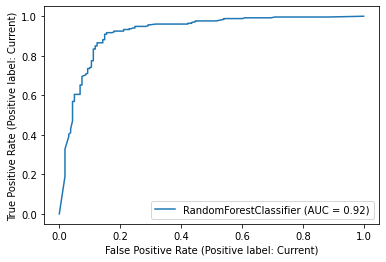

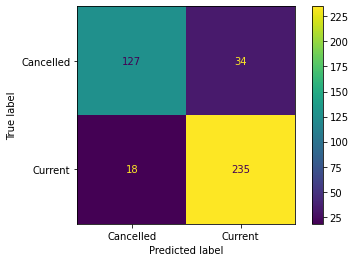

In [ ]:
from sklearn.metrics import accuracy_score
#training Randomforest
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train,y_train)

print("train accuracy score = ", accuracy_score(y_train,rfc.predict(X_train)))
print("test accuracy score = ", accuracy_score(y_test,rfc.predict(X_test)))

plot_roc_curve(rfc, X_test, y_test)
plt.show()

plot_confusion_matrix(rfc, X_test, y_test,values_format='d')
plt.show()

In [ ]:
rfc_predict = rfc.predict(X_test)
print("accuracy Score (training)".format(rfc.score(X_test,y_test)))
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(y_test,rfc_predict))
print("=== Classification Report ===")
print(classification_report(y_test,rfc_predict))

accuracy Score (training)
Confusion Matrix after hypertuning for Random Forest:
[[127  34]
 [ 18 235]]
=== Classification Report ===
              precision    recall  f1-score   support

   Cancelled       0.88      0.79      0.83       161
     Current       0.87      0.93      0.90       253

    accuracy                           0.87       414
   macro avg       0.87      0.86      0.87       414
weighted avg       0.87      0.87      0.87       414

